In [1]:
from netCDF4 import Dataset
import xarray as xr
from pyproj import Proj, Transformer, CRS
from pyproj.aoi import AreaOfInterest
import numpy as np

In [2]:
forcing_path = '/Users/jacobqs/OneDrive - Universitetet i Oslo/budhi_gandaki_input'
cd_path = forcing_path + '/cell_data.nc'
tair_path = forcing_path + '/temperature.nc'
toposcale_path = '/Users/jacobqs/OneDrive - Universitetet i Oslo/budhi_gandaki_input/TopoScale/temperature/temperature_1999.nc'

cd = Dataset(cd_path, mode = 'r')
x_cd = cd.variables['x'][:]
y_cd = cd.variables['y'][:]
ff = cd.variables['forest-fraction'][:]
cd.close() 

In [3]:
t = Dataset(tair_path, mode = 'r')
x_t = t.variables['x'][:]
y_t = t.variables['y'][:]
temp = t.variables['temperature'][0][:]
temp_units = t.variables['temperature'].units
t.close() 

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [5]:
## Making a pyproj object for UTM Zone 45N
crs_32645 = CRS.from_epsg(32645)
crs_4326 = CRS.from_epsg(4326)


## Create transformer to convert from CRS to CRS

transformer = Transformer.from_crs(crs_32645, crs_4326, always_xy = True)

lon_cd , lat_cd = transformer.transform(x_cd, y_cd)
lon_t , lat_t = transformer.transform(x_t, y_t)

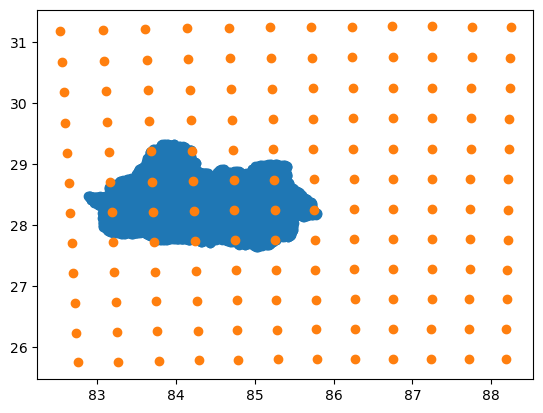

In [6]:
plt.figure()
plt.scatter(lon_cd, lat_cd)
plt.scatter(lon_t, lat_t)
plt.show()

In [7]:
temp_topo = xr.open_mfdataset(toposcale_path)

In [13]:
t = xr.open_mfdataset(tair_path)
t = t.sel(time = '1999')

In [18]:
x_t = t.x.values
y_t = t.y.values
x_topo = temp_topo.x.values
y_topo = temp_topo.y.values


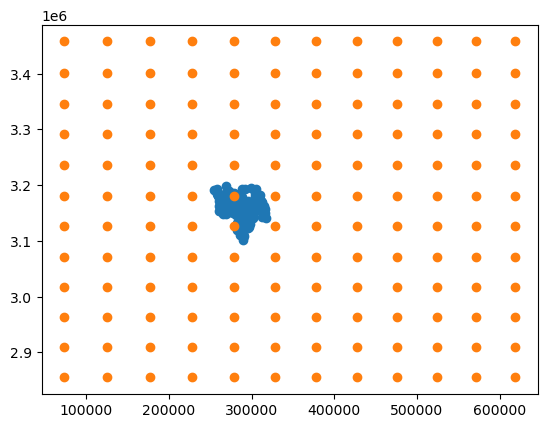

In [21]:
plt.figure()
plt.scatter(x_topo, y_topo)
plt.scatter(x_t, y_t)
plt.show()